<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/load_and_save_keras_trained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2


# Load Some images

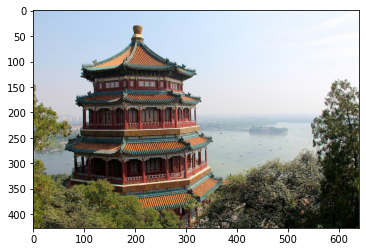

In [3]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()     
len(dataset.images)                

first_img_data = dataset.images[0] 
first_img_data.shape               

plt.imshow(first_img_data)   

(427, 640, 3)


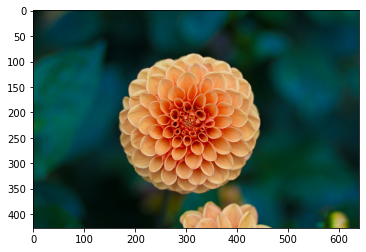

In [4]:
img1 = dataset.images[1] 
print(img1.shape)           

plt.imshow(img1) 

### ResNet50 
input size: 224, 224, 3

In [6]:

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')


x = first_img_data
x = cv2.resize(x, (224,224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 [==============================] - 1s 1s/step
Predicted: [('n02825657', 'bell_cote', 0.82596755), ('n03877845', 'palace', 0.06592146), ('n03781244', 'monastery', 0.04161224)]


In [10]:
model.save_weights('resnet50_weights.h5')

In [16]:
## check
model = ResNet50(weights=None)
model.load_weights('resnet50_weights.h5')
x = cv2.resize(img1, (224,224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n03530642', 'honeycomb', 0.5072083), ('n13040303', 'stinkhorn', 0.3314959), ('n02206856', 'bee', 0.044125117)]


In [17]:
from google.colab import files

files.download('resnet50_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:


import tensorflow as tf
model = tf.keras.applications.ResNet101(weights='imagenet')


x = first_img_data
x = cv2.resize(x, (224,224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 [==============================] - 2s 2s/step
Predicted: [('n03877845', 'palace', 0.45001456), ('n02825657', 'bell_cote', 0.3432609), ('n03781244', 'monastery', 0.07412777)]


In [12]:
from google.colab import files

model.save_weights('resnet101_weights.h5')
files.download('resnet101_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# VGG16

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)


x = cv2.resize(img1, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 609ms/step
Predicted: [('n03530642', 'honeycomb', 0.5072083), ('n13040303', 'stinkhorn', 0.3314959), ('n02206856', 'bee', 0.044125117)]


In [20]:
model.save_weights('vgg16_weights.h5')

In [21]:
files.download('vgg16_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inception

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet')
x = cv2.resize(img1, (224, 224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 514ms/step
Predicted: [('n03530642', 'honeycomb', 0.5072083), ('n13040303', 'stinkhorn', 0.3314959), ('n02206856', 'bee', 0.044125117)]


In [25]:
model.save_weights('inception_v3.h5')

In [26]:
files.download('inception_v3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>